![Atmos CEE Masthead](http://kyrill.ias.sdsmt.edu/SDMines_Livery/AES_CEE_Masthead.png)

# Mapping in Python

This is a deep dive with a lot of repeative plotting to demonstrate how features are added to a graphical object and the impact each one makes to the entire product.  The goal with this stragegy is that it will let us slowly explore how the more advanced graphics in Python work, albiet at the cost of a much longer Python notebook.

In this "Let's Play" session, we will explore the aspects of plotting graphics beyond the simple way that we've been doing it through the semester. 

One reason for this is that when one goes to the "online 'help,'" the examples that are often provided for "how to make a plot" for example tends to expect a user to jump in and intuit what is happening.

Add the more abstract concepts of looking at map projections and how they are managed in any kind of software and 

Personally for me, this is an engraved invitation to rage quit, which I did -- more than once -- when transitioning to Python.  Therefore, in this session we are going to slow-roll the process of making "Fancy Plots" one command at a time. 

## Prerequisite Nerd Skills

For this exercize to get started it's a good idea to have these skills under your belt.  

*  Introductory Plotting with Python.  For a review you can see the "Quick Start" Exercise Number 2 ([Session 2: Arrays, Math, and Plotting in Python (numpy and matplotlib)](https://wjcapehart.github.io/AES_CEE_Python/02%20Crash%20Course%20in%20Basic%20Python.html#session-2-arrays-math-and-plotting-in-python-numpy-and-matplotlib))
*  We'll also be needing a grip on working with Axes and other more advanced graphcis  structures, such as the [previous rage-quit session](https://wjcapehart.github.io/AES_CEE_Python/03%20Rage-Quit%20Explainers%20and%20Deep%20Dives.html#working-with-fancier-elements-of-matplotlib).



## Libraries

### The classics...

To begin we'll load our libraries with two previous old standards:

* [Numpy](https://numpy.org), our standard numerical manager in python
* [MatPlotLib](https://matplotlib.org)'s PyPlot and a few other features

We wil also 

In [3]:
########################################################
#
# Python Libraries
#

#
# Numpy for arrays and basic math
#

import numpy as np

#
# MatPlotLib's Liraries
# 

#   Pyplot for basic plotting

import matplotlib.pyplot as plt

#
########################################################

### ... And Map Projections

Some of you may need to work with geospatial data.  We actually can use the above example to show us the way.  

We had declared a new "projection" for our polar plot called, "polar."  

Now, imagine if you could now plot data in a different cooridate framework, such as latitude and longitude.

This *will* require us to load a new package, [Cartopy](https://scitools.org.uk/cartopy/docs/latest/).  Which contains information as well as the means to plot basic map features like continents and countries.

Depending on what your application is you may need to install more than one package.  

I recommend that it be done this way if you are using anaconda or miniconda.  

```
!conda install shapely cartopy
```

from inside Jupyter.  But you will also need to restart your Jupyter Kernel for it to take hold

You can then load the suplemental libraries.  You should only need the cartopy library to get this going, but you will need to install it much like when you load libaries from scipy.  

* [Cartopy.crs](https://scitools.org.uk/cartopy/docs/latest/crs/index.html#cartopy.crs): Cartopy's list of map projections.  It's job is to connect the x and y position (we call them eastings and northings) to latitude and longitude.  CRS stands for "Coordinate Reference System."

* [Cartopy.features](https://scitools.org.uk/cartopy/docs/latest/matplotlib/feature_interface.html): The features interface in Cartopy draws a set of pre-prepared geospatial features onto the Axes to where the projection (taken from Cartopy.crs) has been defined.

In [4]:
########################################################
#
# Cartopy Python Library
#

import cartopy.crs       as ccrs
import cartopy.feature   as cfeature

#
########################################################

## Cutting a single panel map.

To start let's drop an empty Axis with a projection onto our workspace.

For this example, I'm starting with a global projection called the ["Interrupted Goode Homolosine"](https://en.wikipedia.org/wiki/Goode_homolosine_projection) projection, a projection you may often see in atlases that resembles a peeled origins.

Text(0.5, 1.0, 'Interrupted Goode Homolosine')

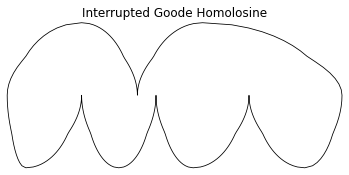

In [6]:
########################################################
#
# Cartopy Example: Laying down our plotting Canvas and Axes
#
# (1) Open a new default (single pannel) figure canvas 
# (2) Reset the axis at (0,0) to be in Robinson Projection Coordinates
# (3) Set a title for the plot
#

fig, ax = plt.subplots()

ax = plt.subplot(1, # First Row
                 1, # Second Column
                 1, # Start at Position 1 starting at one
                 projection=ccrs.InterruptedGoodeHomolosine())

ax.set_title( "Interrupted Goode Homolosine")

#
########################################################

As before, our map is totally unexciting, though it DOES show the peeled orange effect.  That's ok. Because we really need to decide what the map is going to be of.

Will it just have continents?  Will we want to zoom in?  What features do we want to highlight, borders, terrain height?  

For this we are going to do a very simple line map.  To do so, we will dig into the "features" library and just grab the coastliens.

To add a geographical feature use this example which leverages a command designed to use with Matpliblib, [add.feature()](https://scitools.org.uk/cartopy/docs/v0.14/matplotlib/geoaxes.html?highlight=add_feat#cartopy.mpl.geoaxes.GeoAxes.add_feature).  The link with this command includes information on some basic map global scale maps as well as US state boundaries.  

(I am also going to change projections to the [Robinson Projection](https://en.wikipedia.org/wiki/Robinson_projection) which is a simple global coverage without having to "rip" the Earth's surface like we do with the Goode projection. (I'll be showing some different projections as we play.)

Text(0.5, 1.0, 'Robinson Projection')

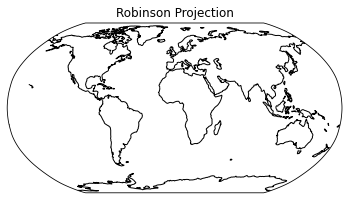

In [7]:
########################################################
#
# Cartopy Example: Laying down our plotting Canvas and Axes
#
# (1) Open a new default (single pannel) figure canvas 
# (2) Reset the axis at (0,0) to be in Robinson Projection Coordinates
# (3) Set a title for the plot
# (4) Render continental boundaries.
#


fig, ax = plt.subplots()

ax = plt.subplot(1, # First Row
                 1, # Second Column
                 1, # Start at Position 1 starting at one
                 projection=ccrs.Robinson())

ax.add_feature(feature = cfeature.COASTLINE)

ax.set_title("Robinson Projection")

#
########################################################

A map is nice we want to put our own data on it.

Let's play with known places on the globe

To do this here is where it gets a little tricky.  For example, plotting data in latitude and longitude would be intuitive.  But in reality you are plotting in an x-y map space in which rather than latitude and longitude, you are plotting in "eastings" and "northings".  

The good news is that your base background can use one projection scheme while you can plot data in another map projetion.  Notice the syntax in the examples below.  We are adding a "new" argument to the plot command: "transform," which you may remember can also be used in polar plotting.

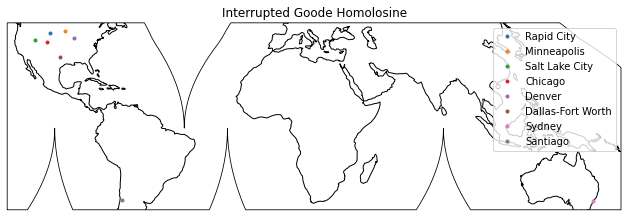

In [84]:
########################################################
#
# Cartopy Example: Laying down our plotting Canvas and Axes
#
# (0) Get latitude and longitudes for various locations
#
# (1) Open a new default (single pannel) figure canvas 
# (2) Reset the axis at (0,0) to be in Robinson Projection Coordinates
# (3) Set a title for the plot
# (4) Render continental boundaries.
# (5) Plot The points in sequence.
# (6) Add Labels.

#
# Add Coordinates of Plotted Points (units are in decimal degrees north and east)
#

#
#  There is a MUCH better way to do this particular plot in Pandas
#    using a Data Frame and I'll add this at the very bottom.
#

KRAP = [-103.0605,  44.0384] # Rapid City, SD
KMSP = [ -93.2223,  44.8848] # Minneapolis, MN
KSLC = [-111.9791,  40.7899] # Salt Lake City, UT
KDEN = [-104.6737,  39.8561] # Denver, CO
KORD = [ -87.9090,  41.9803] # Chicago (O'Hare), IL
KDFW = [ -97.0403,  32.8998] # Dallas-Ft Worth, TX
YSSY = [ 151.2093, -33.8688] # Sydney, NSW
SCEL = [ -70.7944, -33.3898] # Santiago, CL

locations = ["Rapid City", 
             "Minneapolis",
             "Salt Lake City",
             "Chicago",
             "Denver",
             "Dallas-Fort Worth",
             "Sydney",
             "Santiago"]


#
# Add the plot
#

fig, ax = plt.subplots(figsize=[11,8.5])

ax = plt.subplot(1, # First Row
                 1, # Second Column
                 1, # Start at Position 1 starting at one
                 projection=ccrs.InterruptedGoodeHomolosine()) 

ax.add_feature(feature = cfeature.COASTLINE)


ax.plot(KRAP[0], KRAP[1], 
        linestyle =             "None", 
        marker    =                '.', 
        transform = ccrs.PlateCarree())

ax.plot(KMSP[0],  KMSP[1], 
        linestyle =             "None", 
        marker    =                '.', 
        transform = ccrs.PlateCarree())

ax.plot(KSLC[0],  KSLC[1], 
        linestyle =             "None", 
        marker    =                '.', 
        transform = ccrs.PlateCarree())

ax.plot(KDEN[0],  KDEN[1], 
        linestyle =             "None", 
        marker    =                '.', 
        transform = ccrs.PlateCarree())

ax.plot(KORD[0],  KORD[1], 
        linestyle =             "None", 
        marker    =                '.', 
        transform = ccrs.PlateCarree())

ax.plot(KDFW[0],  KDFW[1], 
        linestyle =             "None", 
        marker    =                '.', 
        transform = ccrs.PlateCarree())

ax.plot(YSSY[0],  YSSY[1], 
        linestyle =             "None", 
        marker    =                '.', 
        transform = ccrs.PlateCarree())

ax.plot(SCEL[0],  SCEL[1], 
        linestyle =             "None", 
        marker    =                '.', 
        transform = ccrs.PlateCarree())

ax.legend(locations)




ax.set_title("Interrupted Goode Homolosine")

plt.show()

#
########################################################

## Trolling the Flat Earthers (making lines in a specific vector)

If you have heard about the "flat earther" craze, they project their world in what is often a polar projection.  



Fun fact... the Soviets had this as their go-to projection as well which resulted in a very different worldview (literally) than United States who often uses a [Mercator Projection](https://en.wikipedia.org/wiki/Mercator_projection).  This comes as a surprise to a lot of people but in Meteorology, the mercator projection is often a prefered projection in Numerical Weather Prediction (NWP) when working in the Tropics.  More on that later.


This leads to some genuine bemusent when they ahve to explain ceratin aircraft routes.

Let's repeat the previous graph in the [Polar Stereographic Projection](https://en.wikipedia.org/wiki/Stereographic_map_projection), which, BTW, is popilar as you move poleward in NWP.

Also from above, you can see that if you chose to point a set area of points, the total map extent will "clip" to the fit the data available.  We can fix that with the [axes.set_global()](https://scitools.org.uk/cartopy/docs/v0.13/matplotlib/geoaxes.html#cartopy.mpl.geoaxes.GeoAxes.set_global) modifier (which acutally sits under Cartopy's library.

We are also going to add grid lines.

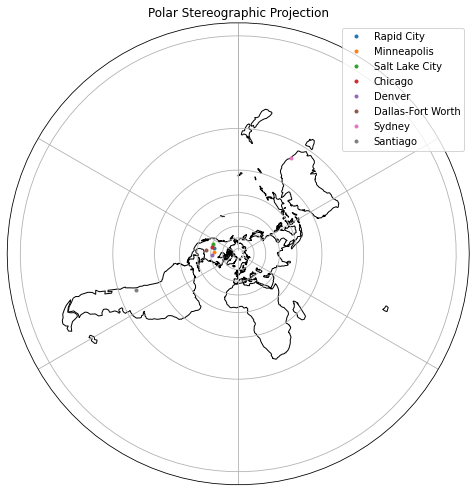

In [87]:
########################################################
#
# Cartopy Example: Laying down our plotting Canvas and Axes 
#.  (Cold War / Flat Earth Edition)
#
# (0) Get latitude and longitudes for various locations
#
#    (We'll dispense with it here and use the ones from above)
#
# (1) Open a new default (single pannel) figure canvas 
# (2) Reset the axis at (0,0) to be in Robinson Projection Coordinates
# (3) Set a title for the plot
# (4) Render continental boundaries.
# (5) Plot The points in sequence.
# (6) Add Labels
# (7) Add Grid Lines
# (8) Set for a full global view.


fig, ax = plt.subplots(figsize=[11,8.5])

ax = plt.subplot(1, # First Row
                 1, # Second Column
                 1, # Start at Position 1 starting at one
                 projection=ccrs.NorthPolarStereo()) 

ax.add_feature(feature = cfeature.COASTLINE)

ax.plot(KRAP[0], KRAP[1], 
        linestyle =             "None", 
        marker    =                '.', 
        transform = ccrs.PlateCarree())

ax.plot(KMSP[0],  KMSP[1], 
        linestyle =             "None", 
        marker    =                '.', 
        transform = ccrs.PlateCarree())

ax.plot(KSLC[0],  KSLC[1], 
        linestyle =             "None", 
        marker    =                '.', 
        transform = ccrs.PlateCarree())

ax.plot(KDEN[0],  KDEN[1], 
        linestyle =             "None", 
        marker    =                '.', 
        transform = ccrs.PlateCarree())

ax.plot(KORD[0],  KORD[1], 
        linestyle =             "None", 
        marker    =                '.', 
        transform = ccrs.PlateCarree())

ax.plot(KDFW[0],  KDFW[1], 
        linestyle =             "None", 
        marker    =                '.', 
        transform = ccrs.PlateCarree())

ax.plot(YSSY[0],  YSSY[1], 
        linestyle =             "None", 
        marker    =                '.', 
        transform = ccrs.PlateCarree())

ax.plot(SCEL[0],  SCEL[1], 
        linestyle =             "None", 
        marker    =                '.', 
        transform = ccrs.PlateCarree())

ax.legend(locations)

ax.set_title("Polar Stereographic Projection")

ax.gridlines()

ax.set_global()

plt.show()

#
########################################################

So you can start to see the problem from the Flat Earther's perspective.  Traveling from Sydney to Santiago SHOULD be impossible.  Indeed, they believe that Qantus Flights 27 and 28, and LATAM Flights 802 & 803 are myths.  Rather, they argue that the *real* flights operate, for example as SYD->LAX->SCL -- which in reality reflects the economics of air travel given that the market for direct flights between Chile & Australia aren't as profitable (and thus, as common) as ~car~plane-pooling between more frequent trips like the daily trips passing through more global hubs like LAX.

So let's map out a few routes (and we'll go back to a regional scale so we can see the details of the flights out of Rapid City.

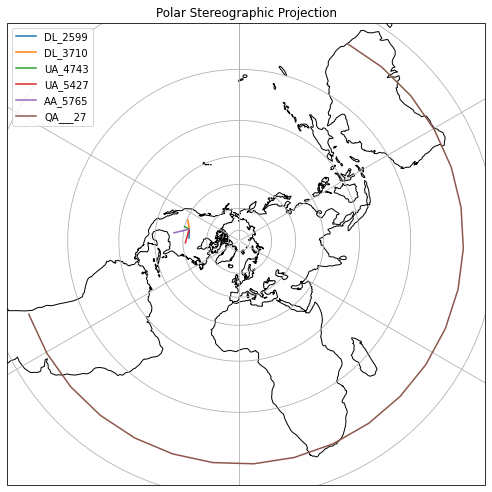

In [91]:
########################################################
#
# Cartopy Example: Plotting Impossible Flight Routes!
#
# (0) Create our Flight Paths
#
# (1) Open a new default (single pannel) figure canvas 
# (2) Reset the axis at (0,0) to be in Robinson Projection Coordinates
# (3) Set a title for the plot
# (4) Render continental boundaries.
# (5) Plot The points in sequence.
# (6) Add Labels.
# (7) Add Grid Lines

#
# Bring out our flight paths!@
#

DL_2599 = np.array([KRAP,KMSP])
DL_3710 = np.array([KRAP,KSLC])
UA_4743 = np.array([KRAP,KDEN])
UA_5427 = np.array([KRAP,KORD])
AA_5765 = np.array([KRAP,KDFW])
QA___27 = np.array([YSSY,SCEL])




flights = ["DL_2599",
           "DL_3710",
           "UA_4743",
           "UA_5427",
           "AA_5765",
           "QA___27"]

fig, ax = plt.subplots(figsize=[11,8.5])

ax = plt.subplot(1, # First Row
                 1, # Second Column
                 1, # Start at Position 1 starting at one
                 projection=ccrs.NorthPolarStereo()) 

ax.add_feature(feature = cfeature.COASTLINE)

ax.plot(DL_2599[:,0], DL_2599[:,1], transform = ccrs.PlateCarree())
ax.plot(DL_3710[:,0], DL_3710[:,1], transform = ccrs.PlateCarree())
ax.plot(UA_4743[:,0], UA_4743[:,1], transform = ccrs.PlateCarree())
ax.plot(UA_5427[:,0], UA_5427[:,1], transform = ccrs.PlateCarree())
ax.plot(AA_5765[:,0], AA_5765[:,1], transform = ccrs.PlateCarree())
ax.plot(QA___27[:,0], QA___27[:,1], transform = ccrs.PlateCarree())

ax.legend(flights)

ax.set_title("Polar Stereographic Projection")

ax.gridlines()


plt.show()

#
########################################################

Checkmate Flat Earthers!... Uh.. almost.  